In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import graphviz
import pandas
import random

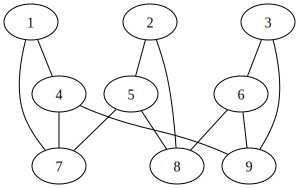

In [2]:
# Draw a graph based on adjacency matrix
def plot_graph(adj, node, layout = "dot"):
    g = graphviz.Graph(engine = layout)
    for n in node:
        g.node(n)
    for r in range(len(adj)):
        for c in range(len(adj[r])):
            if adj[r][c]:
                g.edge(node[r], node[c])
    return g

adj = pandas.read_csv("graph.csv", header = None).values.tolist()
node = [str(x + 1) for x in range(len(adj))]
plot_graph(adj, node)

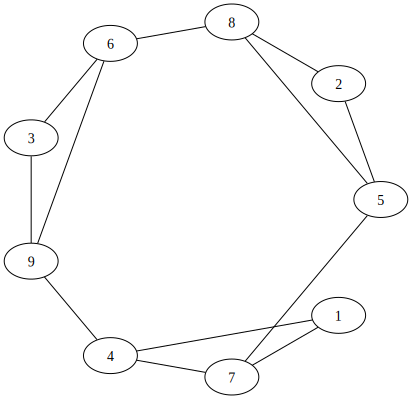

In [3]:
# Use the circular layout
plot_graph(adj, node, "circo")

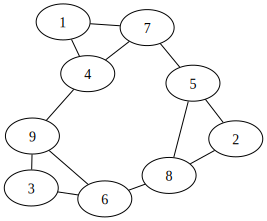

In [4]:
# Use the force directed layout
plot_graph(adj, node, "fdp")

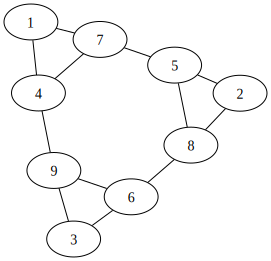

In [5]:
# Use the spring model layout (energy directed)
plot_graph(adj, node, "neato")

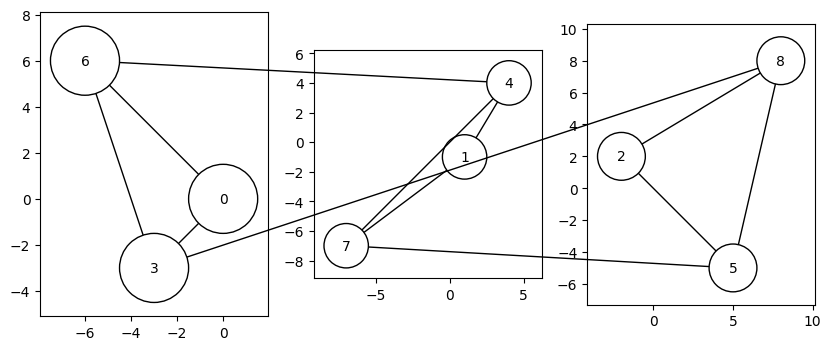

In [6]:
# Manually draw three groups of nodes in three subplots with fixed locations
import random
n = 3
fig, ax = plt.subplots(1, n, figsize = (10, 10))
pos = [(0, 0), (1, -1), (-2, 2), (-3, -3), (4, 4), (5, -5), (-6, 6), (-7, -7), (8, 8)]
group = [0, 1, 2, 0, 1, 2, 0, 1, 2]
list = [None] * 9
size = 3;
for i in range(len(pos)):
    node = patches.Ellipse(pos[i], size, size, ec = "Black", fc = "White")
    list[i] = node
    ax[group[i]].add_artist(node)
    ax[group[i]].text(pos[i][0], pos[i][1], str(i), ha = "center", va = "center")
for i in range(n):
    ax[i].relim()
    ax[i].autoscale_view()
    ax[i].set_aspect(1)
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i][j]:
            edge = patches.ConnectionPatch(pos[i], pos[j], "data", "data", axesA = ax[group[i]], axesB = ax[group[j]], patchA = list[i], patchB = list[j])
            fig.add_artist(edge)         